In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
api_data = pd.read_csv("steam_app_data.csv")
api_data

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,...,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,game,Counter-Strike,10,0.0,False,NaN,NaN,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 65735},{'total': 0},"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 2802},{'total': 0},"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/20/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
2,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 1992},{'total': 0},"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/30/...,"{'ids': [], 'notes': None}"
3,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 931},{'total': 0},"{'coming_soon': False, 'date': '1 Jun, 2001'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/40/...,"{'ids': [], 'notes': None}"
4,game,Half-Life: Opposing Force,50,0.0,False,NaN,NaN,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 4355},{'total': 0},"{'coming_soon': False, 'date': '1 Nov, 1999'}","{'url': 'https://help.steampowered.com', 'emai...",https://steamcdn-a.akamaihd.net/steam/apps/50/...,"{'ids': [], 'notes': None}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29230,game,Room of Pandora,1065230,0.0,False,NaN,NaN,"<img src=""https://steamcdn-a.akamaihd.net/stea...","<img src=""https://steamcdn-a.akamaihd.net/stea...",The Room of Pandora is a third-person interact...,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '25', 'description': 'Adventure'}, {'i...","[{'id': 0, 'path_thumbnail': 'https://steamcdn...","[{'id': 256747452, 'name': 'Video', 'thumbnail...",NaN,"{'total': 7, 'highlighted': [{'name': 'THE FIR...","{'coming_soon': False, 'date': '24 Apr, 2019'}",{'url': 'https://goldlogsh.wixsite.com/myapps'...,https://steamcdn-a.akamaihd.net/steam/apps/106...,"{'ids': [], 'notes': None}"
29231,game,Cyber Gun,1065570,0.0,False,NaN,NaN,Have you ever been so lonely that no one but y...,Have you ever been so lonely that no one but y...,Cyber Gun is a hardcore first-person shooter w...,...,"[{'id': 2, 'description': 'Single-player'}]",

In [95]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29235 entries, 0 to 29234
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     29086 non-null  object 
 1   name                     29234 non-null  object 
 2   steam_appid              29235 non-null  int64  
 3   required_age             29086 non-null  float64
 4   is_free                  29086 non-null  object 
 5   controller_support       5998 non-null   object 
 6   dlc                      4975 non-null   object 
 7   detailed_description     29060 non-null  object 
 8   about_the_game           29060 non-null  object 
 9   short_description        29060 non-null  object 
 10  fullgame                 0 non-null      float64
 11  supported_languages      29072 non-null  object 
 12  header_image             29086 non-null  object 
 13  website                  19252 non-null  object 
 14  pc_requirements       

In [96]:
api_data.isnull().sum()

type                         149
name                           1
steam_appid                    0
required_age                 149
is_free                      149
controller_support         23237
dlc                        24260
detailed_description         175
about_the_game               175
short_description            175
fullgame                   29235
supported_languages          163
header_image                 149
website                     9983
pc_requirements              149
mac_requirements             149
linux_requirements           149
legal_notice               19168
drm_notice                 29077
ext_user_account_notice    28723
developers                   264
publishers                   149
demos                      27096
price_overview              3712
packages                    3370
package_groups               149
platforms                    149
metacritic                 26254
reviews                    23330
categories                   714
genres    

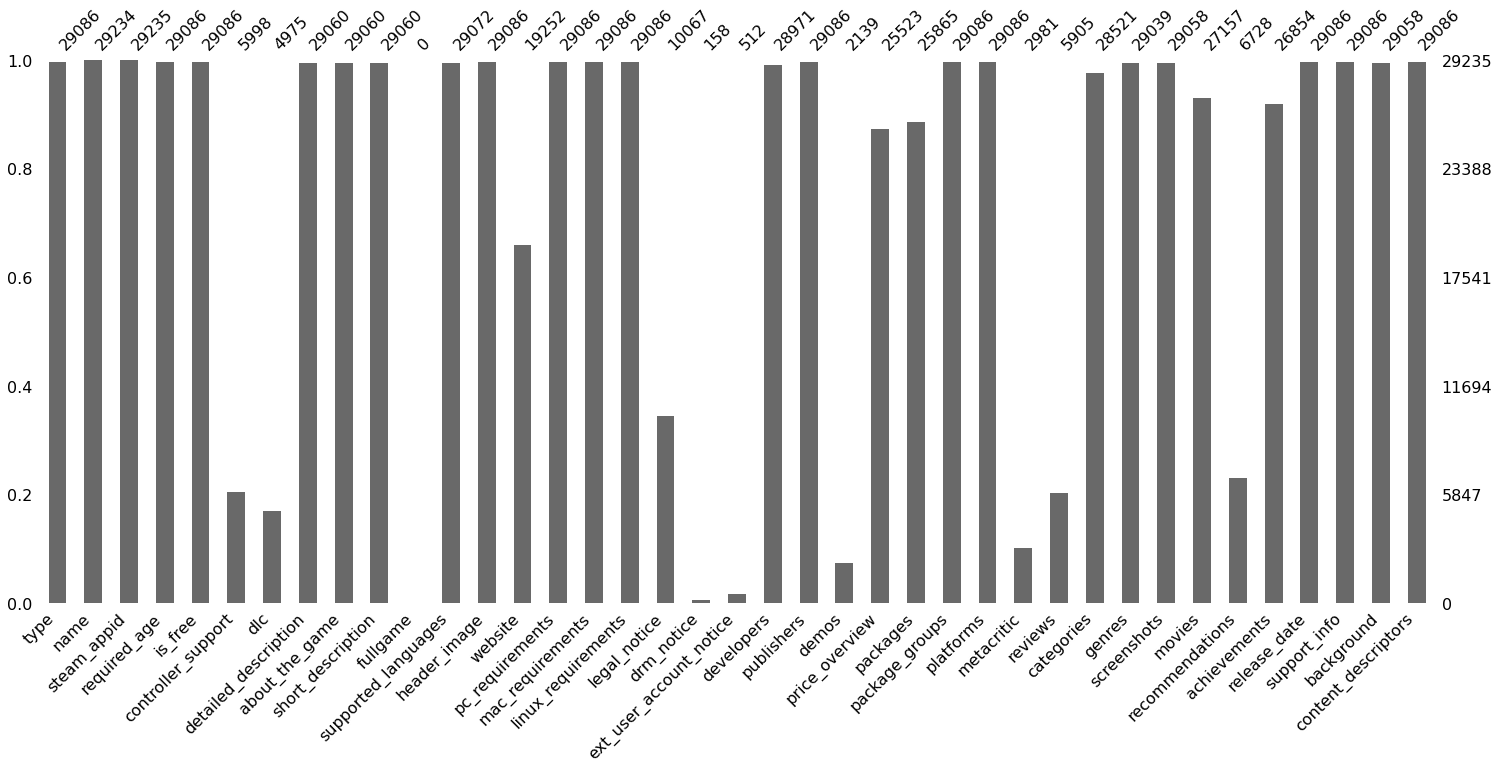

In [97]:
# Total number of missing values is calculated by summing up all the null values in each column(1000 values)
import missingno as msno
msno.bar(api_data)
plt.show()

In [98]:
# Removing columns that are not required or don't add any value
columns_to_remove = ['fullgame', 'legal_notice', 'ext_user_account_notice', 'demos', 'drm_notice','reviews', 'detailed_description', 'about_the_game', 'short_description','fullgame','header_image','packages','package_groups','support_info','movies','release_date','background','content_descriptors']

api_data = api_data.drop(columns_to_remove, axis=1)
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29235 entries, 0 to 29234
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 29086 non-null  object 
 1   name                 29234 non-null  object 
 2   steam_appid          29235 non-null  int64  
 3   required_age         29086 non-null  float64
 4   is_free              29086 non-null  object 
 5   controller_support   5998 non-null   object 
 6   dlc                  4975 non-null   object 
 7   supported_languages  29072 non-null  object 
 8   website              19252 non-null  object 
 9   pc_requirements      29086 non-null  object 
 10  mac_requirements     29086 non-null  object 
 11  linux_requirements   29086 non-null  object 
 12  developers           28971 non-null  object 
 13  publishers           29086 non-null  object 
 14  price_overview       25523 non-null  object 
 15  platforms            29086 non-null 

In [99]:
api_data['type'].value_counts(dropna=False)

game    29086
NaN       149
Name: type, dtype: int64

In [100]:
duplicates_rows = api_data[api_data.duplicated()]
print("number of duplicate rows: ", duplicates_rows.shape[0])
duplicates_rows.head(3)

number of duplicate rows:  7


,type,name,steam_appid,required_age,is_free,controller_support,dlc,supported_languages,website,pc_requirements,...,developers,publishers,price_overview,platforms,metacritic,categories,genres,screenshots,recommendations,achievements
31,game,SiN Episodes: Emergence,1300,0.0,False,NaN,NaN,"English, Russian, French",NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,...,['Ritual Entertainment'],['Ritual Entertainment'],"{'currency': 'GBP', 'initial': 719, 'final': 7...","{'windows': True, 'mac': False, 'linux': False}","{'score': 75, 'url': 'https://www.metacritic.c...","[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",{'total': 265},{'total': 0}
32,game,SiN Episodes: Emergence,1300,0.0,False,NaN,NaN,"English, Russian, French",NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,...,['Ritual Entertainment'],['Ritual Entertainment'],"{'currency': 'GBP', 'initial': 719, 'final': 7...","{'windows': True, 'mac': False, 'linux': False}","{'score': 75, 'url': 'https://www.metacritic.c...","[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",{'total': 265},{'total': 0}
356,game,Jagged Alliance 2 Gold,1620,0.0,False,NaN,NaN,English,http://www.jaggedalliance2.com/,{'minimum': '<p><strong>Minimum Configuration:...,...,['Strategy First'],['Strategy First'],"{'currency': 'GBP', 'initial': 1499, 'final': ...","{'windows': True, 'mac': False, 'linux': False}",NaN,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '2', 'description': 'Strategy'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 0}


In [101]:
print("Number of rows before dropping duplicates:", api_data.shape[0])
api_data_cleaned = api_data.drop_duplicates()
print("Number of rows after dropping duplicates:", api_data_cleaned.shape[0])

Number of rows before dropping duplicates: 29235
Number of rows after dropping duplicates: 29228


In [102]:
api_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29228 entries, 0 to 29234
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 29079 non-null  object 
 1   name                 29227 non-null  object 
 2   steam_appid          29228 non-null  int64  
 3   required_age         29079 non-null  float64
 4   is_free              29079 non-null  object 
 5   controller_support   5998 non-null   object 
 6   dlc                  4975 non-null   object 
 7   supported_languages  29065 non-null  object 
 8   website              19249 non-null  object 
 9   pc_requirements      29079 non-null  object 
 10  mac_requirements     29079 non-null  object 
 11  linux_requirements   29079 non-null  object 
 12  developers           28964 non-null  object 
 13  publishers           29079 non-null  object 
 14  price_overview       25516 non-null  object 
 15  platforms            29079 non-null 

In [103]:
def process_name_type(api_data_cleaned):
    # Removing null values in name and type columns, and remove type column
    api_data_cleaned = api_data_cleaned[api_data_cleaned['type'].notnull()]
    
    api_data_cleaned = api_data_cleaned[api_data_cleaned['name'].notnull()]
    api_data_cleaned = api_data_cleaned[api_data_cleaned['name'] != 'none']
    
    api_data_cleaned = api_data_cleaned.drop('type', axis=1)
    
    return api_data_cleaned
    

def process(api_data_cleaned):
    """Process data set. Will eventually contain calls to all functions we write."""
    
    # Copying the input dataframe so I dont lose data for 100th time
    # Keep doing it all fuctions
    api_data_cleaned = api_data_cleaned.copy()
    
    # Removing duplicate rows
    api_data_cleaned = api_data_cleaned.drop_duplicates()
    
    api_data_cleaned = process_name_type(api_data_cleaned)
    
    return api_data_cleaned

api_data_cleaned = process(api_data_cleaned)
api_data_cleaned

,name,steam_appid,required_age,is_free,controller_support,dlc,supported_languages,website,pc_requirements,mac_requirements,...,developers,publishers,price_overview,platforms,metacritic,categories,genres,screenshots,recommendations,achievements
0,Counter-Strike,10,0.0,False,NaN,NaN,"English<strong>*</strong>, French<strong>*</st...",NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'GBP', 'initial': 719, 'final': 7...","{'windows': True, 'mac': True, 'linux': True}","{'score': 88, 'url': 'https://www.metacritic.c...","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",{'total': 65735},{'total': 0}
1,Team Fortress Classic,20,0.0,False,NaN,NaN,"English, French, German, Italian, Spanish - Sp...",NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'GBP', 'initial': 399, 'final': 3...","{'windows': True, 'mac': True, 'linux': True}",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",{'total': 2802},{'total': 0}
2,Day of Defeat,30,0.0,False,NaN,NaN,"English, French, German, Italian, Spanish - Spain",http://www.dayofdefeat.com/,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'GBP', 'initial': 399, 'final': 3...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",{'total': 1992},{'total': 0}
3,Deathmatch Classic,40,0.0,False,NaN,NaN,"English, French, German, Italian, Spanish - Sp...",NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Valve'],['Valve'],"{'currency': 'GBP', 'initial': 399, 'final': 3...","{'windows': True, 'mac': True, 'linux': True}",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",{'total': 931},{'total': 0}
4,Half-Life: Opposing Force,50,0.0,False,NaN,NaN,"English, French, German, Korean",NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,...,['Gearbox Software'],['Valve'],"{'currency': 'GBP', 'initial': 399, 'final': 3...","{'windows': True, 'mac': True, 'linux': True}",NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",{'total': 4355},{'total': 0}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29230,Room of Pandora,1065230,0.0,False,NaN,NaN,"English, Japanese, Simplified Chinese, Traditi...",NaN,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],...,['SHEN JIAWEI'],['SHEN JIAWEI'],"{'currency': 'GBP', 'initial': 209, 'final': 1...","{'windows': True, 'mac': False, 'linux': False}",NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '25', 'description': 'Adventure'}, {'i...","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,"{'total': 7, 'highlighted': [{'name': 'THE FIR..."
29231,Cyber Gun,1065570,0.0,False,NaN,NaN,English,NaN,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],...,['Semyon Maximov'],['BekkerDev Studio'],"{'currency': 'GBP', 'initial': 169, 'final': 1...","{'windows': True, 'mac': False, 'linux': False}",NaN,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,NaN
29232,Super Star Blast,1065650,0.0,False,full,NaN,English<strong>*</strong><br><strong>*</strong...,http://entwickler-x.de/super-star

In [104]:
api_data_cleaned['required_age'].value_counts(dropna=False).sort_index()

0.0       28431
1.0           1
3.0          10
4.0           2
5.0           1
6.0           1
7.0           8
10.0          3
11.0          4
12.0         72
13.0         21
14.0          4
15.0         39
16.0        141
17.0         47
18.0        288
20.0          1
1818.0        1
Name: required_age, dtype: int64

In [105]:
def process_age(api_data_cleaned):
    #Format ratings in age column to be in line with the PEGI Age Ratings system because project require PG13 content
    # PEGI Age ratings: 3, 7, 12, 16, 18
    cut_points = [-1, 0, 3, 7, 12, 16, 2000]
    label_values = [0, 3, 7, 13, 16, 18]
    
    api_data_cleaned['required_age'] = pd.cut(api_data_cleaned['required_age'], bins=cut_points, labels=label_values)
    
    return api_data_cleaned


age_df = process_age(api_data_cleaned)
age_df['required_age'].value_counts().sort_index()

0     28431
3        11
7        12
13       79
16      205
18      337
Name: required_age, dtype: int64

In [106]:
age_df['price_overview'].head()

0    {'currency': 'GBP', 'initial': 719, 'final': 7...
1    {'currency': 'GBP', 'initial': 399, 'final': 3...
2    {'currency': 'GBP', 'initial': 399, 'final': 3...
3    {'currency': 'GBP', 'initial': 399, 'final': 3...
4    {'currency': 'GBP', 'initial': 399, 'final': 3...
Name: price_overview, dtype: object

In [107]:
age_df['platforms'].head()

0    {'windows': True, 'mac': True, 'linux': True}
1    {'windows': True, 'mac': True, 'linux': True}
2    {'windows': True, 'mac': True, 'linux': True}
3    {'windows': True, 'mac': True, 'linux': True}
4    {'windows': True, 'mac': True, 'linux': True}
Name: platforms, dtype: object

In [108]:
platforms_first_row = age_df['platforms'].iloc[0]

print(type(platforms_first_row))

platforms_first_row

<class 'str'>


"{'windows': True, 'mac': True, 'linux': True}"

In [109]:
from ast import literal_eval
eval_first_row = literal_eval(platforms_first_row)

print(type(eval_first_row))
print(eval_first_row)

eval_first_row['windows']

<class 'dict'>
{'windows': True, 'mac': True, 'linux': True}


True

In [110]:
age_df['required_age'].value_counts(dropna=False).sort_index()

0     28431
3        11
7        12
13       79
16      205
18      337
Name: required_age, dtype: int64

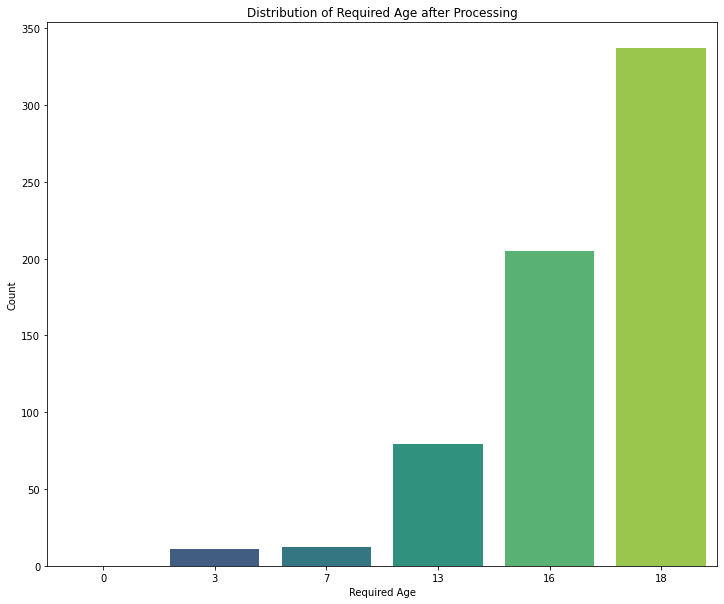

In [144]:
filtered_df = age_df[age_df['required_age'] != 0]

# Create the bar chart
plt.figure(figsize=(12, 10))
sns.countplot(x='required_age', data=filtered_df, palette='viridis')

plt.xlabel('Required Age')
plt.ylabel('Count')
plt.title('Distribution of Required Age after Processing')

# Show the plot
plt.show()

In [112]:
';'.join(eval_first_row.keys())

'windows;mac;linux'

In [113]:
platforms = {'windows': True, 'mac': True, 'linux': False}

# list comprehension
print([x for x in platforms.keys() if platforms[x]])

# using list comprehension in join
';'.join(x for x in platforms.keys() if platforms[x])

['windows', 'mac']


'windows;mac'

In [114]:
def process_platforms(api_data_cleaned):

    # Spliting the platforms column into multiple columns
    # evaluate values in platforms column
    api_data_cleaned = api_data_cleaned.copy()
    
    def parse_platforms(x):
        
        d = literal_eval(x)
        
        return ';'.join(platform for platform in d.keys() if d[platform])
    
    api_data_cleaned['platforms'] = api_data_cleaned['platforms'].apply(parse_platforms)
    
    return api_data_cleaned


platforms_df = process_platforms(age_df)
platforms_df['platforms'].value_counts()

windows              19887
windows;mac;linux     4851
windows;mac           3687
windows;linux          643
mac                      5
mac;linux                1
linux                    1
Name: platforms, dtype: int64

In [115]:
platforms_df['price_overview'].isnull().sum()

3559

In [116]:
free_and_null_price = platforms_df[(platforms_df['is_free']) & (platforms_df['price_overview'].isnull())]

free_and_null_price.shape[0]

2713

In [117]:
not_free_and_null_price = platforms_df[(platforms_df['is_free'] == False) & (platforms_df['price_overview'].isnull())]

not_free_and_null_price.head()

,name,steam_appid,required_age,is_free,controller_support,dlc,supported_languages,website,pc_requirements,mac_requirements,...,developers,publishers,price_overview,platforms,metacritic,categories,genres,screenshots,recommendations,achievements
63,The Ship: Single Player,2420,0,False,NaN,NaN,"English, French, German, Italian, Spanish - Sp...",http://www.blazinggriffin.com/games/the-ship-m...,{'minimum': '<strong>Minimum:</strong> 1.8 GHz...,[],...,['Outerlight Ltd.'],['Blazing Griffin Ltd.'],NaN,windows,NaN,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",{'total': 362},{'total': 0}
75,RollerCoaster Tycoon® 3: Platinum,2700,0,False,NaN,NaN,"English, French, Italian, German, Spanish - Sp...",http://www.atari.com/rollercoastertycoon/us/in...,{'minimum': '<strong>Minimum: </strong><br>\t\...,"{'minimum': '<ul class=""bb_ul""><li><strong>OS:...",...,"['Frontier', 'Aspyr (Mac)']","['Atari', 'Aspyr (Mac)']",NaN,windows;mac,"{'score': 81, 'url': 'https://www.metacritic.c...","[{'id': 2, 'description': 'Single-player'}]","[{'id': '28', 'description': 'Simulation'}, {'...","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",{'total': 3156},{'total': 0}
220,BioShock™,7670,0,False,NaN,NaN,"English<strong>*</strong>, French<strong>*</st...",http://www.BioShockGame.com,"{'minimum': '<h2 class=""bb_tag""><strong>Minimu...",{'minimum': 'Please See BioShock Remastered'},...,"['2K Boston', '2K Australia']",['2K'],NaN,windows,"{'score': 96, 'url': 'https://www.metacritic.c...","[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",{'total': 15584},{'total': 0}
234,Sam & Max 101: Culture Shock,8200,0,False,NaN,NaN,"English, French, German, Italian",http://store.steampowered.com/app/901660/,"{'minimum': 'Windows XP or Vista, 1.5GHz proce...",[],...,['Telltale Games'],['Telltale Games'],NaN,windows,NaN,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",{'total': 271},{'total': 0}
235,Sam & Max 102: Situation: Comedy,8210,0,False,NaN,NaN,"English, German, Italian",http://store.steampowered.com/app/901660/,"{'minimum': 'Windows XP or Vista, 1.5GHz proce...",[],...,['Telltale Games'],['Telltale Games'],NaN,windows,NaN,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 0}


In [118]:
def print_steam_links(df):
    #Print links to store page for apps in a dataframe
    url_base = "https://store.steampowered.com/app/"
    
    for i, row in df.iterrows():
        appid = row['steam_appid']
        name = row['name']
        
        print(name + ':', url_base + str(appid))
        

print_steam_links(not_free_and_null_price[:5])

The Ship: Single Player: https://store.steampowered.com/app/2420
RollerCoaster Tycoon® 3: Platinum: https://store.steampowered.com/app/2700
BioShock™: https://store.steampowered.com/app/7670
Sam & Max 101: Culture Shock: https://store.steampowered.com/app/8200
Sam & Max 102: Situation: Comedy: https://store.steampowered.com/app/8210


In [119]:
def process_price(api_data_cleaned):
    api_data_cleaned = api_data_cleaned.copy()
        
    def parse_price(x):
        if x is not np.nan:
            return literal_eval(x)
        else:
            return {'currency': 'GBP', 'initial': -1}
    
    # Evaluatitng as dictionary and set to -1 if missing
    api_data_cleaned['price_overview'] = api_data_cleaned['price_overview'].apply(parse_price)
    
    # Creating columns from currency and initial values
    api_data_cleaned['currency'] = api_data_cleaned['price_overview'].apply(lambda x: x['currency'])
    api_data_cleaned['price'] = api_data_cleaned['price_overview'].apply(lambda x: x['initial'])
    
    # Setting price of free games to 0
    api_data_cleaned.loc[api_data_cleaned['is_free'], 'price'] = 0
    
    return api_data_cleaned

price_data = process_price(platforms_df)[['name', 'currency', 'price']]
price_data.head()

,name,currency,price
0,Counter-Strike,GBP,719
1,Team Fortress Classic,GBP,399
2,Day of Defeat,GBP,399
3,Deathmatch Classic,GBP,399
4,Half-Life: Opposing Force,GBP,399


In [120]:
price_data[price_data['currency'] != 'GBP']

,name,currency,price
991,Robin Hood: The Legend of Sherwood,USD,799
5767,Assassin’s Creed® Chronicles: India,EUR,999
27593,Mortal Kombat 11,USD,5999
27995,Pagan Online,EUR,2699


In [121]:
import pandas as pd
import numpy as np
from ast import literal_eval

def process_price(api_data_cleaned):
    """Process price_overview column into formatted price column."""
    if not isinstance(api_data_cleaned, pd.DataFrame):
        raise ValueError("Input must be a DataFrame.")
    
    api_data_cleaned = api_data_cleaned.copy()
    
    def parse_price(x):
        if x is not np.nan:
            return literal_eval(x)
        else:
            return {'currency': 'GBP', 'initial': -1}
    
    # evaluate as dictionary and set to -1 if missing
    api_data_cleaned['price_overview'] = api_data_cleaned['price_overview'].apply(parse_price)
    
    # create columns from currency and initial values
    api_data_cleaned['currency'] = api_data_cleaned['price_overview'].apply(lambda x: x['currency'])
    api_data_cleaned['price'] = api_data_cleaned['price_overview'].apply(lambda x: x['initial'])
    
    # set price of free games to 0
    api_data_cleaned.loc[api_data_cleaned['is_free'], 'price'] = 0
    
    # remove non-GBP rows
    api_data_cleaned = api_data_cleaned[api_data_cleaned['currency'] == 'GBP']
    
    # change price to display in pounds (only applying to rows with a value greater than 0)
    api_data_cleaned.loc[api_data_cleaned['price'] > 0, 'price'] /= 100
    
    # remove columns no longer needed
    api_data_cleaned = api_data_cleaned.drop(['is_free', 'currency', 'price_overview'], axis=1)
    
    return api_data_cleaned

price_df = process_price(platforms_df)
price_df[['name', 'price']].head()

,name,price
0,Counter-Strike,7.19
1,Team Fortress Classic,3.99
2,Day of Defeat,3.99
3,Deathmatch Classic,3.99
4,Half-Life: Opposing Force,3.99


In [122]:
def process_language(df):
    """Process supported_languages column into a boolean 'is english' column."""
    df = df.copy()
    
    # drop rows with missing language data
    df = df.dropna(subset=['supported_languages'])
    
    df['english'] = df['supported_languages'].apply(lambda x: 1 if 'english' in x.lower() else 0)
    df = df.drop('supported_languages', axis=1)
    
    return df


language_df = process_language(price_df)
language_df[['name', 'english']].head()

,name,english
0,Counter-Strike,1
1,Team Fortress Classic,1
2,Day of Defeat,1
3,Deathmatch Classic,1
4,Half-Life: Opposing Force,1


In [123]:
print('Developers null counts:', language_df['developers'].isnull().sum())
print('Developers empty list counts:', language_df[language_df['developers'] == "['']"].shape[0])

print('\nPublishers null counts:', language_df['publishers'].isnull().sum())
print('Publishers empty list counts:', language_df[language_df['publishers'] == "['']"].shape[0])

Developers null counts: 112
Developers empty list counts: 0

Publishers null counts: 0
Publishers empty list counts: 230


In [124]:
no_dev = language_df[language_df['developers'].isnull()]

print('Total games missing developer:', no_dev.shape[0], '\n')

print_steam_links(no_dev[:5])

no_pub = language_df[language_df['publishers'] == "['']"]

print('\nTotal games missing publisher:', no_pub.shape[0], '\n')
print_steam_links(no_pub[:5])

no_dev_or_pub = language_df[(language_df['developers'].isnull()) & (language_df['publishers'] == "['']")]

print('\nTotal games missing developer and publisher:', no_dev_or_pub.shape[0], '\n')
print_steam_links(no_dev_or_pub[:5])

Total games missing developer: 112 

Tycoon City: New York: https://store.steampowered.com/app/9730
Nikopol: Secrets of the Immortals: https://store.steampowered.com/app/11370
Crash Time 2: https://store.steampowered.com/app/11390
Hunting Unlimited 2010: https://store.steampowered.com/app/12690
18 Wheels of Steel: Extreme Trucker: https://store.steampowered.com/app/33730

Total games missing publisher: 230 

RIP - Trilogy™: https://store.steampowered.com/app/2540
Vigil: Blood Bitterness™: https://store.steampowered.com/app/2570
Bullet Candy: https://store.steampowered.com/app/6600
AudioSurf: https://store.steampowered.com/app/12900
Everyday Shooter: https://store.steampowered.com/app/16300

Total games missing developer and publisher: 74 

Patterns: https://store.steampowered.com/app/218980
PlayClaw 5 - Game Recording and Streaming: https://store.steampowered.com/app/237370
Artemis Spaceship Bridge Simulator: https://store.steampowered.com/app/247350
A Walk in the Dark: https://store.s

In [125]:
language_df[['developers', 'publishers']].iloc[24:28]

,developers,publishers
24,['Valve'],['Valve']
25,"['Valve', 'Hidden Path Entertainment']",['Valve']
27,['Mark Healey'],['Mark Healey']
28,['Tripwire Interactive'],['Tripwire Interactive']


In [126]:
def process_developers_and_publishers(df):
    # remove rows with missing data
    df = df[(df['developers'].notnull()) & (df['publishers'] != "['']")].copy()
    
    for col in ['developers', 'publishers']:
        df[col] = df[col].apply(lambda x: literal_eval(x))
        
        # filter dataframe to rows with lists longer than 1, and store the number of rows
        num_rows = df[df[col].str.len() > 1].shape[0]
        
        print('Rows in {} column with multiple values:'.format(col), num_rows)

process_developers_and_publishers(language_df)

Rows in developers column with multiple values: 1761
Rows in publishers column with multiple values: 903


In [127]:
language_df.loc[language_df['developers'].str.contains(",", na=False), ['steam_appid', 'developers', 'publishers']].head(4)

,steam_appid,developers,publishers
25,730,"['Valve', 'Hidden Path Entertainment']",['Valve']
66,2520,"['CINEMAX, s.r.o.']","['CINEMAX, s.r.o.']"
73,2630,"['Infinity Ward', 'Aspyr (Mac)']","['Activision', 'Aspyr (Mac)']"
75,2700,"['Frontier', 'Aspyr (Mac)']","['Atari', 'Aspyr (Mac)']"


In [128]:
# Can use this for association rule mining
language_df.loc[language_df['developers'].str.contains(";", na=False), ['steam_appid', 'developers', 'publishers']]

,steam_appid,developers,publishers
9550,460210,['bool games;'],['bool games;']
13489,568480,"[';)', 'Quickdraw Studios']",['Quickdraw Studios']
16871,665890,['Semicolon;'],['Semicolon;']


In [129]:
language_df[(language_df['publishers'] == "['NA']") | (language_df['publishers'] == "['N/A']")].shape[0]

12

In [130]:
def process_developers_and_publishers(df):
    """Parse columns as semicolon-separated string."""
    # remove rows with missing data (~ means not)
    df = df[(df['developers'].notnull()) & (df['publishers'] != "['']")].copy()
    df = df[~(df['developers'].str.contains(';')) & ~(df['publishers'].str.contains(';'))]
    df = df[(df['publishers'] != "['NA']") & (df['publishers'] != "['N/A']")]
    
    # create list for each
    df['developer'] = df['developers'].apply(lambda x: ';'.join(literal_eval(x)))
    df['publisher'] = df['publishers'].apply(lambda x: ';'.join(literal_eval(x)))

    df = df.drop(['developers', 'publishers'], axis=1)
    
    return df

dev_pub_df = process_developers_and_publishers(language_df)
dev_pub_df[['name', 'steam_appid', 'developer', 'publisher']].head()

,name,steam_appid,developer,publisher
0,Counter-Strike,10,Valve,Valve
1,Team Fortress Classic,20,Valve,Valve
2,Day of Defeat,30,Valve,Valve
3,Deathmatch Classic,40,Valve,Valve
4,Half-Life: Opposing Force,50,Gearbox Software,Valve


In [131]:
print('Categories:\n')
print('Null values:', dev_pub_df['categories'].isnull().sum())
print()
print(dev_pub_df['categories'][0])

print('\nGenres:\n')
print('Null values:', dev_pub_df['genres'].isnull().sum())
print()
print(dev_pub_df['genres'].iloc[0])
print(dev_pub_df['genres'].iloc[1000])

Categories:

Null values: 550

[{'id': 1, 'description': 'Multi-player'}, {'id': 36, 'description': 'Online Multi-Player'}, {'id': 37, 'description': 'Local Multi-Player'}, {'id': 8, 'description': 'Valve Anti-Cheat enabled'}]

Genres:

Null values: 38

[{'id': '1', 'description': 'Action'}]
[{'id': '4', 'description': 'Casual'}]


In [132]:
# Can use this for association rule mining
def process_categories_and_genres(df):
    df = df.copy()
    df = df[(df['categories'].notnull()) & (df['genres'].notnull())]
    
    for col in ['categories', 'genres']:
        df[col] = df[col].apply(lambda x: ';'.join(item['description'] for item in literal_eval(x)))
    
    return df

cat_gen_df = process_categories_and_genres(dev_pub_df)
cat_gen_df[['steam_appid', 'categories', 'genres']].head()

,steam_appid,categories,genres
0,10,Multi-player;Online Multi-Player;Local Multi-P...,Action
1,20,Multi-player;Online Multi-Player;Local Multi-P...,Action
2,30,Multi-player;Valve Anti-Cheat enabled,Action
3,40,Multi-player;Online Multi-Player;Local Multi-P...,Action
4,50,Single-player;Multi-player;Valve Anti-Cheat en...,Action


In [133]:
print('Achievements null counts:', cat_gen_df['achievements'].isnull().sum())

cat_gen_df[['name', 'achievements']].iloc[8:13]

Achievements null counts: 2132


,name,achievements
8,Half-Life: Blue Shift,{'total': 0}
9,Half-Life 2,"{'total': 33, 'highlighted': [{'name': 'Defian..."
10,Counter-Strike: Source,"{'total': 147, 'highlighted': [{'name': 'Someo..."
11,Half-Life: Source,{'total': 0}
12,Day of Defeat: Source,"{'total': 54, 'highlighted': [{'name': 'Double..."


In [134]:
cat_gen_df.to_csv('cleaned_api_data.csv', index=False)

In [135]:
cat_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28192 entries, 0 to 29234
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   name                28192 non-null  object  
 1   steam_appid         28192 non-null  int64   
 2   required_age        28192 non-null  category
 3   controller_support  5934 non-null   object  
 4   dlc                 4887 non-null   object  
 5   website             18646 non-null  object  
 6   pc_requirements     28192 non-null  object  
 7   mac_requirements    28192 non-null  object  
 8   linux_requirements  28192 non-null  object  
 9   platforms           28192 non-null  object  
 10  metacritic          2926 non-null   object  
 11  categories          28192 non-null  object  
 12  genres              28192 non-null  object  
 13  screenshots         28179 non-null  object  
 14  recommendations     6584 non-null   object  
 15  achievements        26060 non-null  

In [136]:
dev_count = cat_gen_df['developer'].value_counts().head(10)
dev_count

Choice of Games               94
KOEI TECMO GAMES CO., LTD.    72
Ripknot Systems               62
Laush Dmitriy Sergeevich      53
Nikita "Ghost_RUS"            50
Dexion Games                  45
Telltale Games                43
Hosted Games                  43
RewindApp                     43
Blender Games                 40
Name: developer, dtype: int64

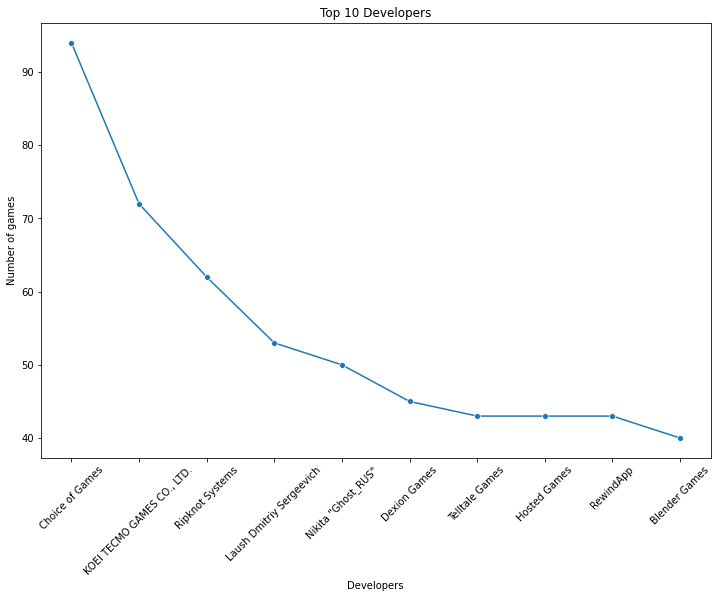

In [147]:
# Number of game published by developers
plt.figure(figsize=(12, 8))
sns.lineplot(x=dev_count.index, y=dev_count.values, marker='o')
plt.xticks(rotation=45)
plt.xlabel('Developers')
plt.ylabel('Number of games')
plt.title('Top 10 Developers')
plt.show()

In [138]:
pub_count = cat_gen_df['publisher'].value_counts().head(10)
pub_count

Big Fish Games         231
Strategy First         137
Ubisoft                113
THQ Nordic             104
Square Enix             99
Sekai Project           98
Choice of Games         94
1C Entertainment        91
Dagestan Technology     90
SEGA                    88
Name: publisher, dtype: int64

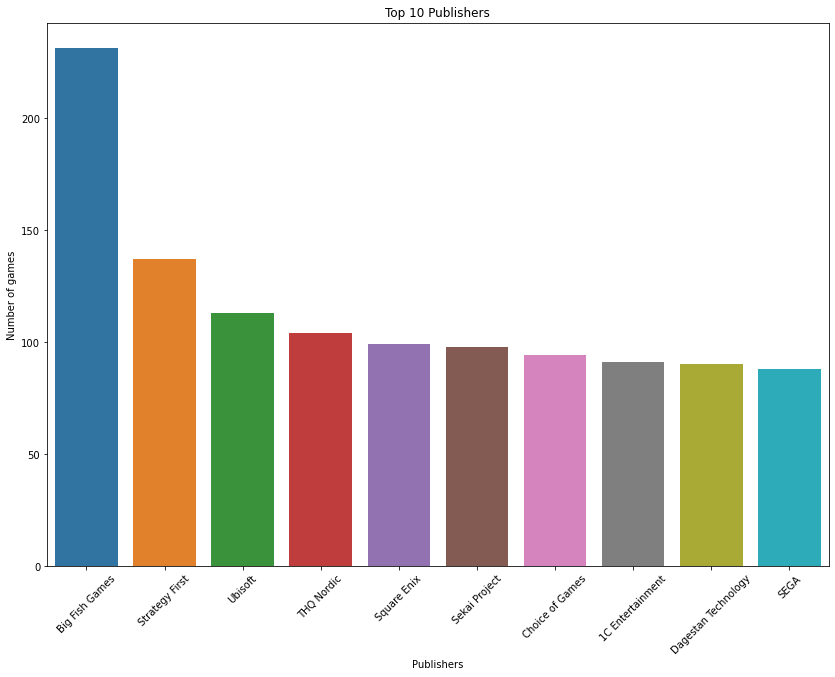

In [150]:
plt.figure(figsize=(14, 10))
sns.barplot(x=pub_count.index, y=pub_count.values)
plt.xticks(rotation=45)
plt.xlabel('Publishers')
plt.ylabel('Number of games')
plt.title('Top 10 Publishers')
plt.show()

In [140]:
cat_count = cat_gen_df['categories'].value_counts().head(10)
cat_count

#print(type(cat_count))
cat_count = cat_count.reset_index(False)
cat_count.columns = ['Category', 'Count']
cat_count

,Category,Count
0,Single-player,6314
1,Single-player;Steam Achievements,2453
2,Single-player;Steam Achievements;Steam Trading...,860
3,Single-player;Partial Controller Support,838
4,Single-player;Steam Trading Cards,805
5,Single-player;Steam Achievements;Steam Cloud,679
6,Single-player;Steam Achievements;Steam Trading...,660
7,Single-player;Steam Achievements;Full controll...,596
8,Single-player;Full controller support,584
9,Single-player;Steam Achievements;Full controll...,513


In [155]:
import plotly.express as px
fig = px.treemap(cat_count, path=['Category'], values='Count',
                 title='Treemap of Top 10 Game Categories',
                 color='Count', color_continuous_scale='viridis')
fig.update_layout(width=1000, height=800)
fig.show()

C:\Users\prani\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

